# **Capstone Project: Part One**

This notebook aims to explore the dataset 'BookMyShow ads URL Analysis' to understand its structure and the relationships between its features.
The dataset contains 11,000 samples with 32 features for each URL, labeled as legitimate, suspicious, or phishing.

The main steps in this notebook will include:
1. Loading and inspecting the dataset
2. Handling missing values
3. Normalizing or standardizing feature values
4. Converting categorical features into numerical ones if necessary
5. Creating visualizations to understand the data better

The final goal of this analysis is to prepare the data for machine learning models to detect malicious or phishing URLs.

### Section 1: Importing Libraries

In [125]:
# All these libraies will be use for the EDA
import pandas as pd   # For data manipulation and analysis
import seaborn as sns # For data visualization
import matplotlib.pyplot as plt # For plotting
import numpy as np   # For numerical operations

# Setting the visual theme for the plots
sns.set_theme(style="whitegrid")

### Section 2: Loading the Dataset

In [126]:
# This script is written using Google Colab
# Therefore the drive needs to be mounted to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
# Loading the dataset from the provided file path
file_path = '/content/drive/MyDrive/Berkeley/Capstone/Part 1/book_my_show_dataset.csv'
df = pd.read_csv(file_path)

In [128]:
# Display the first few rows of the dataset to understand its structure
df.head()

index  having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
0     1                           0              1                   1   
1     2                           1              1                   1   
2     3                           1             -1                   1   
3     4                           1             -1                   1   
4     5                           1             -1                   0   

   having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
0                 1                         0              0   
1                 1                         1              0   
2                 1                         1              0   
3                 1                         1              0   
4                 1                         1              0   

   having_Sub_Domain  SSLfinal_State  Domain_registeration_length  ...  \
0                  0               0                            0  ...   
1                 -1               1                            0  ...   
2                  0               0                            0  ...   
3                  0               0                            1  ...   
4                  1               1                            0  ...   

   popUpWidnow  Iframe  age_of_domain  DNSRecord  web_traffic  Page_Rank  \
0            1       1              0          0            0          0   
1            1       1              0          0           -1          0   
2            1       1              1          0            1          0   
3            1       1              0          0            1          0   
4            0       1              0          0           -1          0   

   Google_Index  Links_pointing_to_page  Statistical_report  Result  
0             1                       1                   0       0  
1             1                       1                   1       0  
2             1                      -1                   0       0  
3             1                       0                   1       0  
4             1                       1                   1       1  

[5 rows x 32 columns]

### Section 3: Inspecting the Dataset

In [129]:
# Checking the structure and basic statistics of the dataset
df.info()  # To see the data types and non-null values
df.describe()  # To get the summary statistics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

having_IPhaving_IP_Address  URLURL_Length  Shortining_Service  \
count                11055.000000   11055.000000        11055.000000   
mean                     0.656897       0.165084            0.869380   
std                      0.474767       0.402826            0.336999   
min                      0.000000      -1.000000            0.000000   
25%                      0.000000       0.000000            1.000000   
50%                      1.000000       0.000000            1.000000   
75%                      1.000000       0.000000            1.000000   
max                      1.000000       1.000000            1.000000   

       having_At_Symbol  double_slash_redirecting  Prefix_Suffix  \
count      11055.000000              11055.000000   11055.000000   
mean           0.850294                  0.870737       0.132519   
std            0.356799                  0.335506       0.339070   
min            0.000000                  0.000000       0.000000   
25%            1.000000                  1.000000       0.000000   
50%            1.000000                  1.000000       0.000000   
75%            1.000000                  1.000000       0.000000   
max            1.000000                  1.000000       1.000000   

       having_Sub_Domain  SSLfinal_State  Domain_registeration_length  \
count       11055.000000    11055.000000                 11055.000000   
mean            0.040525        0.467119                     0.331615   
std             0.833195        0.678297                     0.470815   
min            -1.000000       -1.000000                     0.000000   
25%            -1.000000        0.000000                     0.000000   
50%             0.000000        1.000000                     0.000000   
75%             1.000000        1.000000                     1.000000   
max             1.000000        1.000000                     1.000000   

            Favicon  ...   popUpWidnow        Iframe  age_of_domain  \
count  11055.000000  ...  11055.000000  11055.000000   11055.000000   
mean       0.814292  ...      0.806694      0.908458       0.530620   
std        0.388888  ...      0.394909      0.288392       0.499084   
min        0.000000  ...      0.000000      0.000000       0.000000   
25%        1.000000  ...      1.000000      1.000000       0.000000   
50%        1.000000  ...      1.000000      1.000000       1.000000   
75%        1.000000  ...      1.000000      1.000000       1.000000   
max        1.000000  ...      1.000000      1.000000       1.000000   

          DNSRecord   web_traffic     Page_Rank  Google_Index  \
count  11055.000000  11055.000000  11055.000000  11055.000000   
mean       0.688557      0.295070      0.258164      0.860787   
std        0.463104      0.820263      0.437644      0.346184   
min        0.000000     -1.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000   
50%        1.000000      1.000000      0.000000      1.000000   
75%        1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000   

       Links_pointing_to_page  Statistical_report        Result  
count            11055.000000        11055.000000  11055.000000  
mean                -0.163275            0.859792      0.556943  
std                  0.961174            0.347218      0.496769  
min                 -1.000000            0.000000      0.000000  
25%                 -1.000000            1.000000      0.000000  
50%                 -1.000000            1.000000      1.000000  
75%                  1.000000            1.000000      1.000000  
max                  1.000000            1.000000      1.000000  

[8 rows x 31 columns]

In [130]:
# Checking for missing values in the dataset
df.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

### Section 4: Dropping Unnecessary Columns

In [131]:
# Dropping the 'index' column as it is not needed for analysis
df.drop(columns=['index'], inplace=True)

In [132]:
# Identifying and dropping duplicate columns if any
df = df.loc[:,~df.columns.duplicated()]

### Section 5: Normalizing or Standardizing Feature Values

In [133]:
# Normalizing numerical features to bring them onto a similar scale
from sklearn.preprocessing import StandardScaler

In [134]:
# Selecting numerical columns for normalization
numerical_cols = df.select_dtypes(include=[np.number]).columns

In [135]:
# Initializing the StandardScaler
scaler = StandardScaler()

In [136]:
# Applying the scaler to the numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

### Section 6: Converting Categorical Features into Numerical Ones

In [137]:
# The 'Result' column is the target variable and is already numerical
# Checking the unique values in the 'Result' column
df['Result'].value_counts()

Result
 0.891918    6157
-1.121180    4898
Name: count, dtype: int64

### Section 7: Exploratory Data Analysis (EDA)

<ipython-input-138-422ea9100d3b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




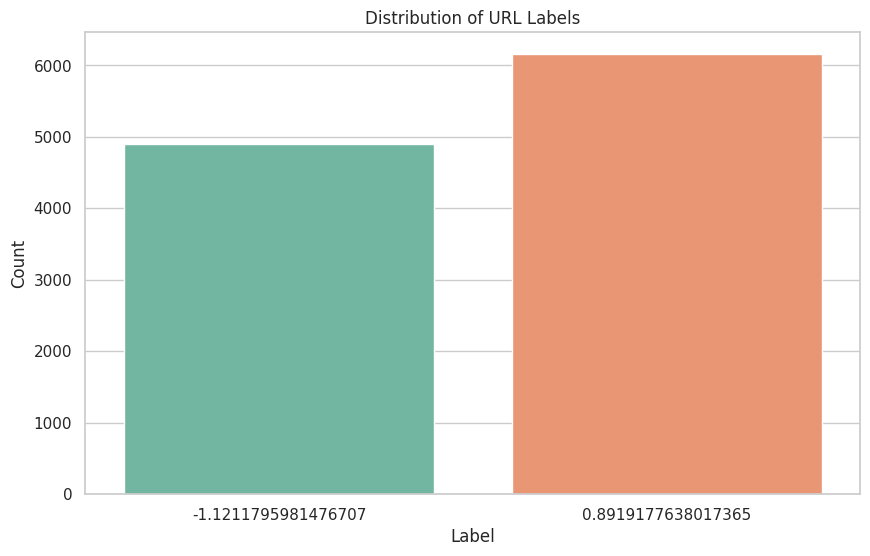

In [138]:
# Bar plot for the 'Result' column to show the distribution of URL labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Result', data=df, palette='Set2')
plt.title('Distribution of URL Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

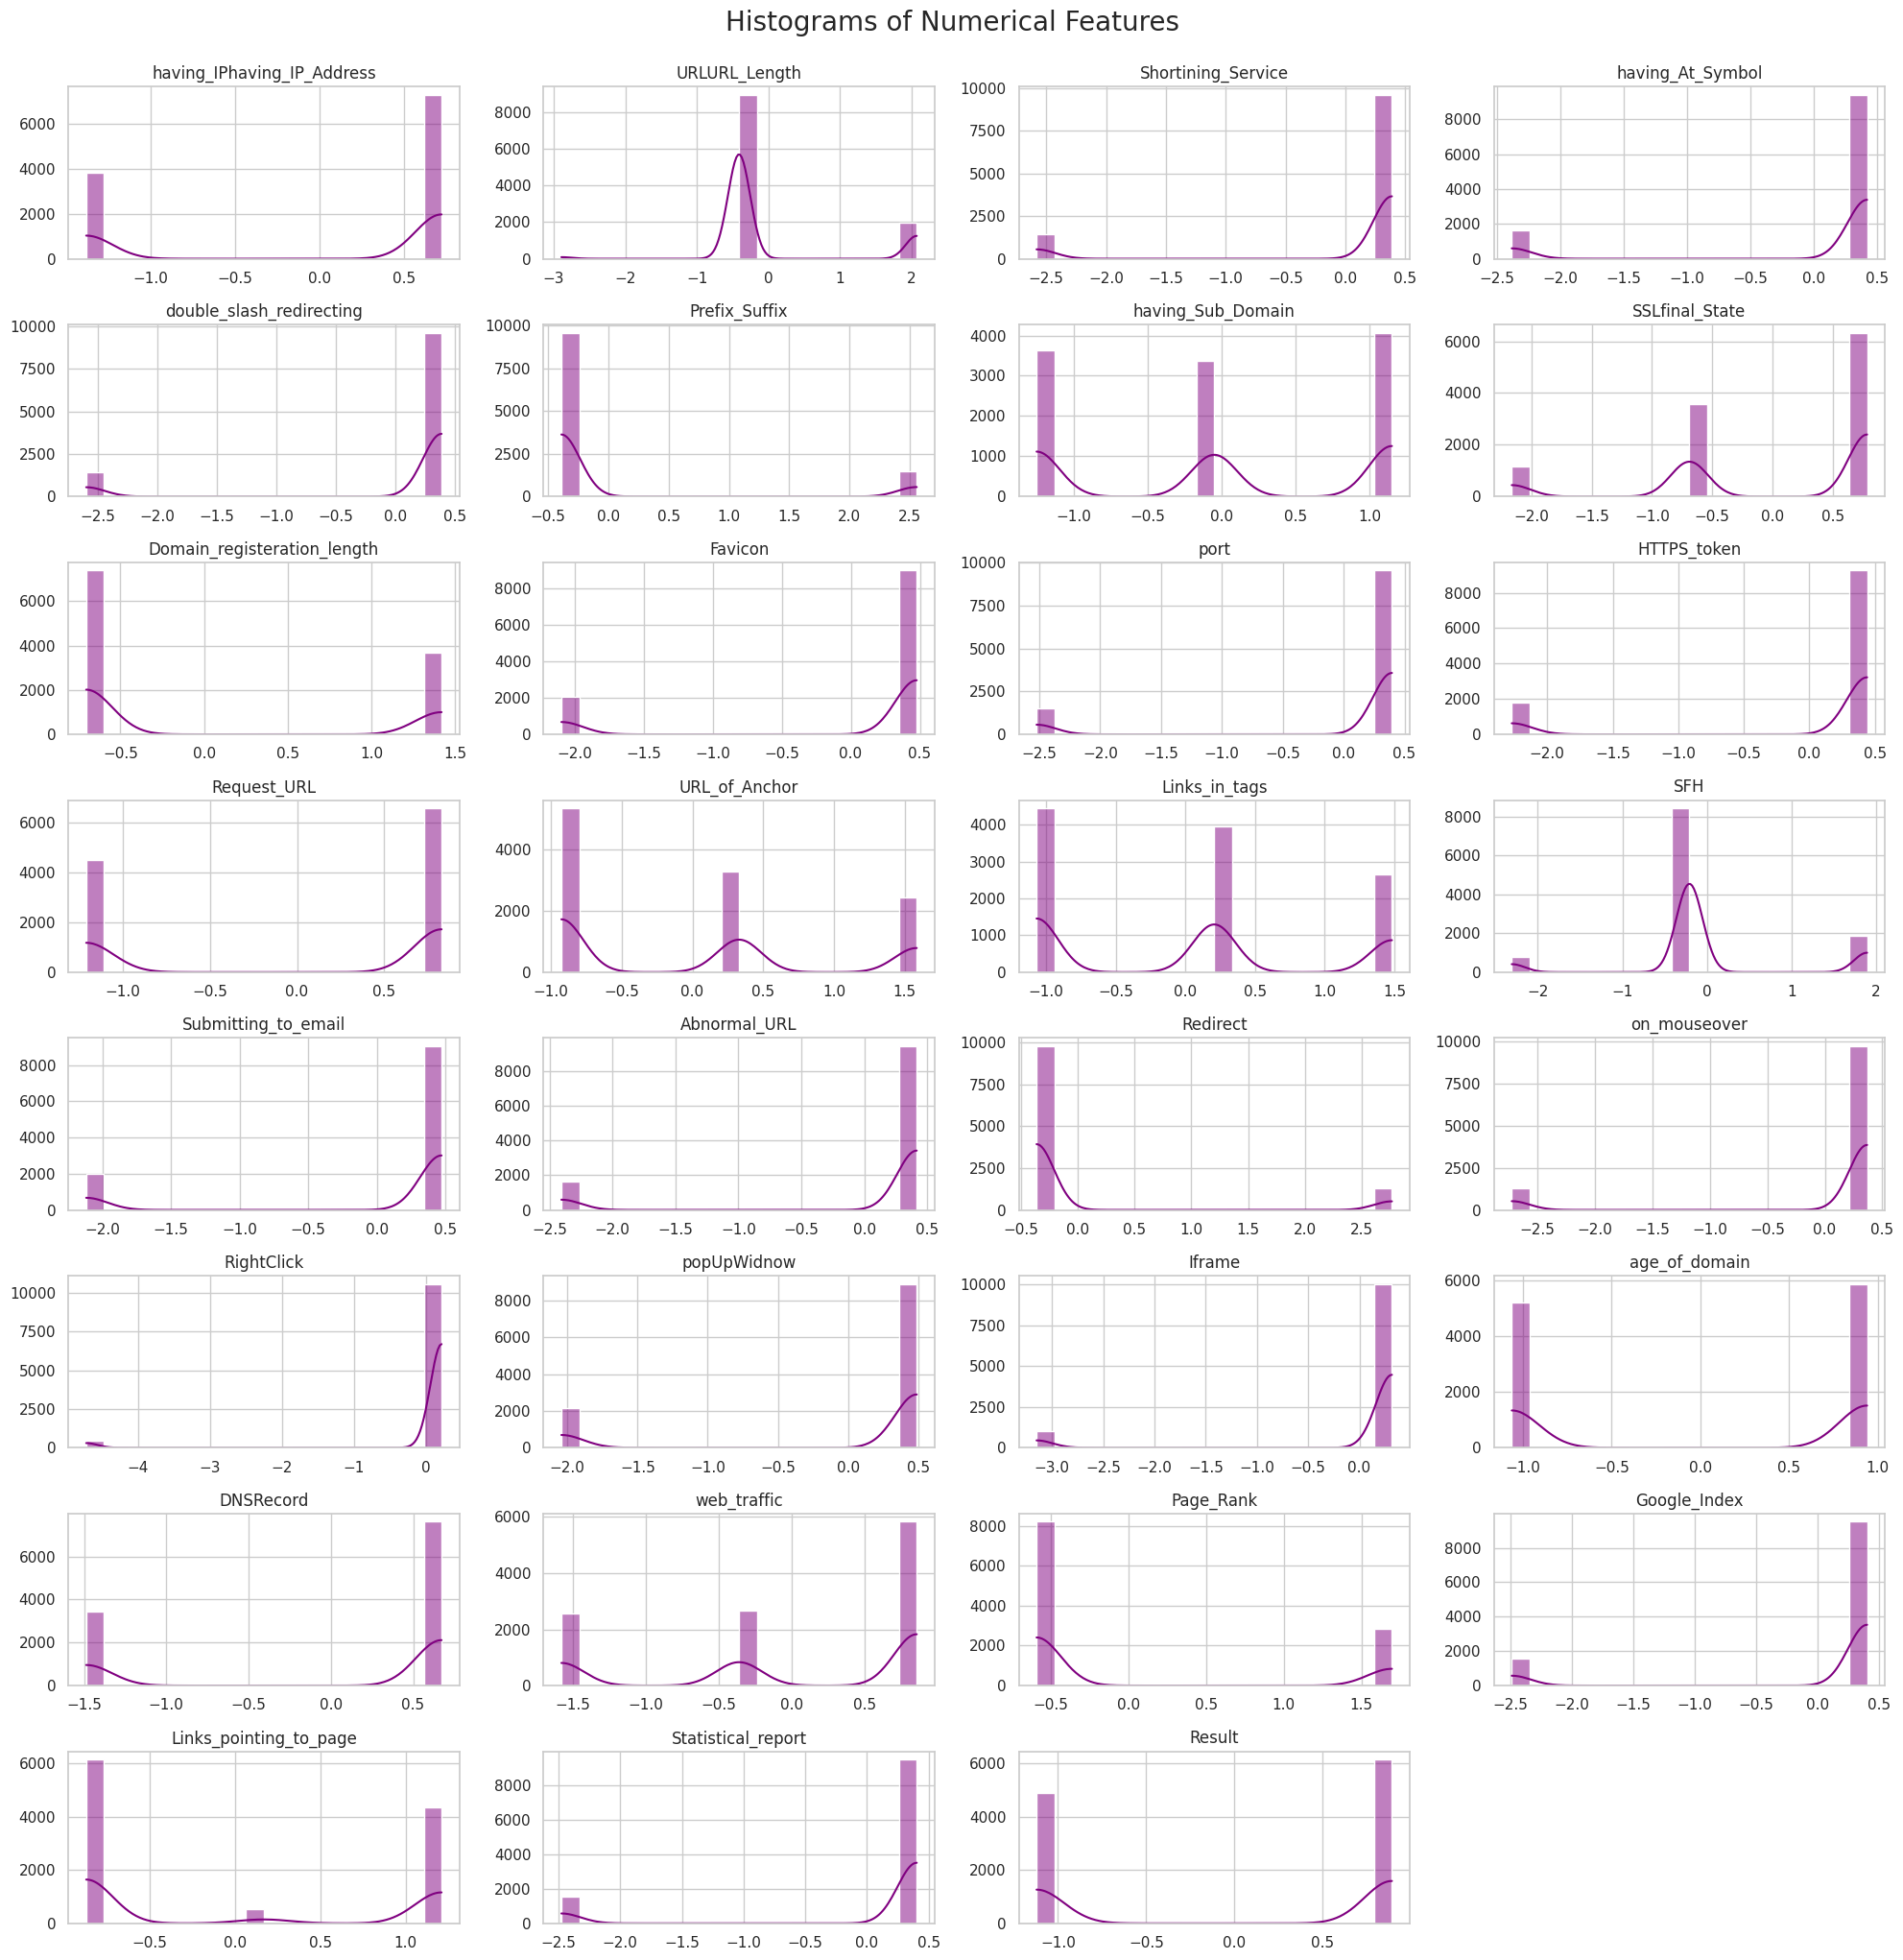

In [139]:
# Histograms for numerical features with adjusted spacing
numerical_cols = df.select_dtypes(include=[np.number]).columns

fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color='purple', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Removing any empty subplots
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

fig.tight_layout()
plt.suptitle('Histograms of Numerical Features', fontsize=20, y=1.02)
plt.show()


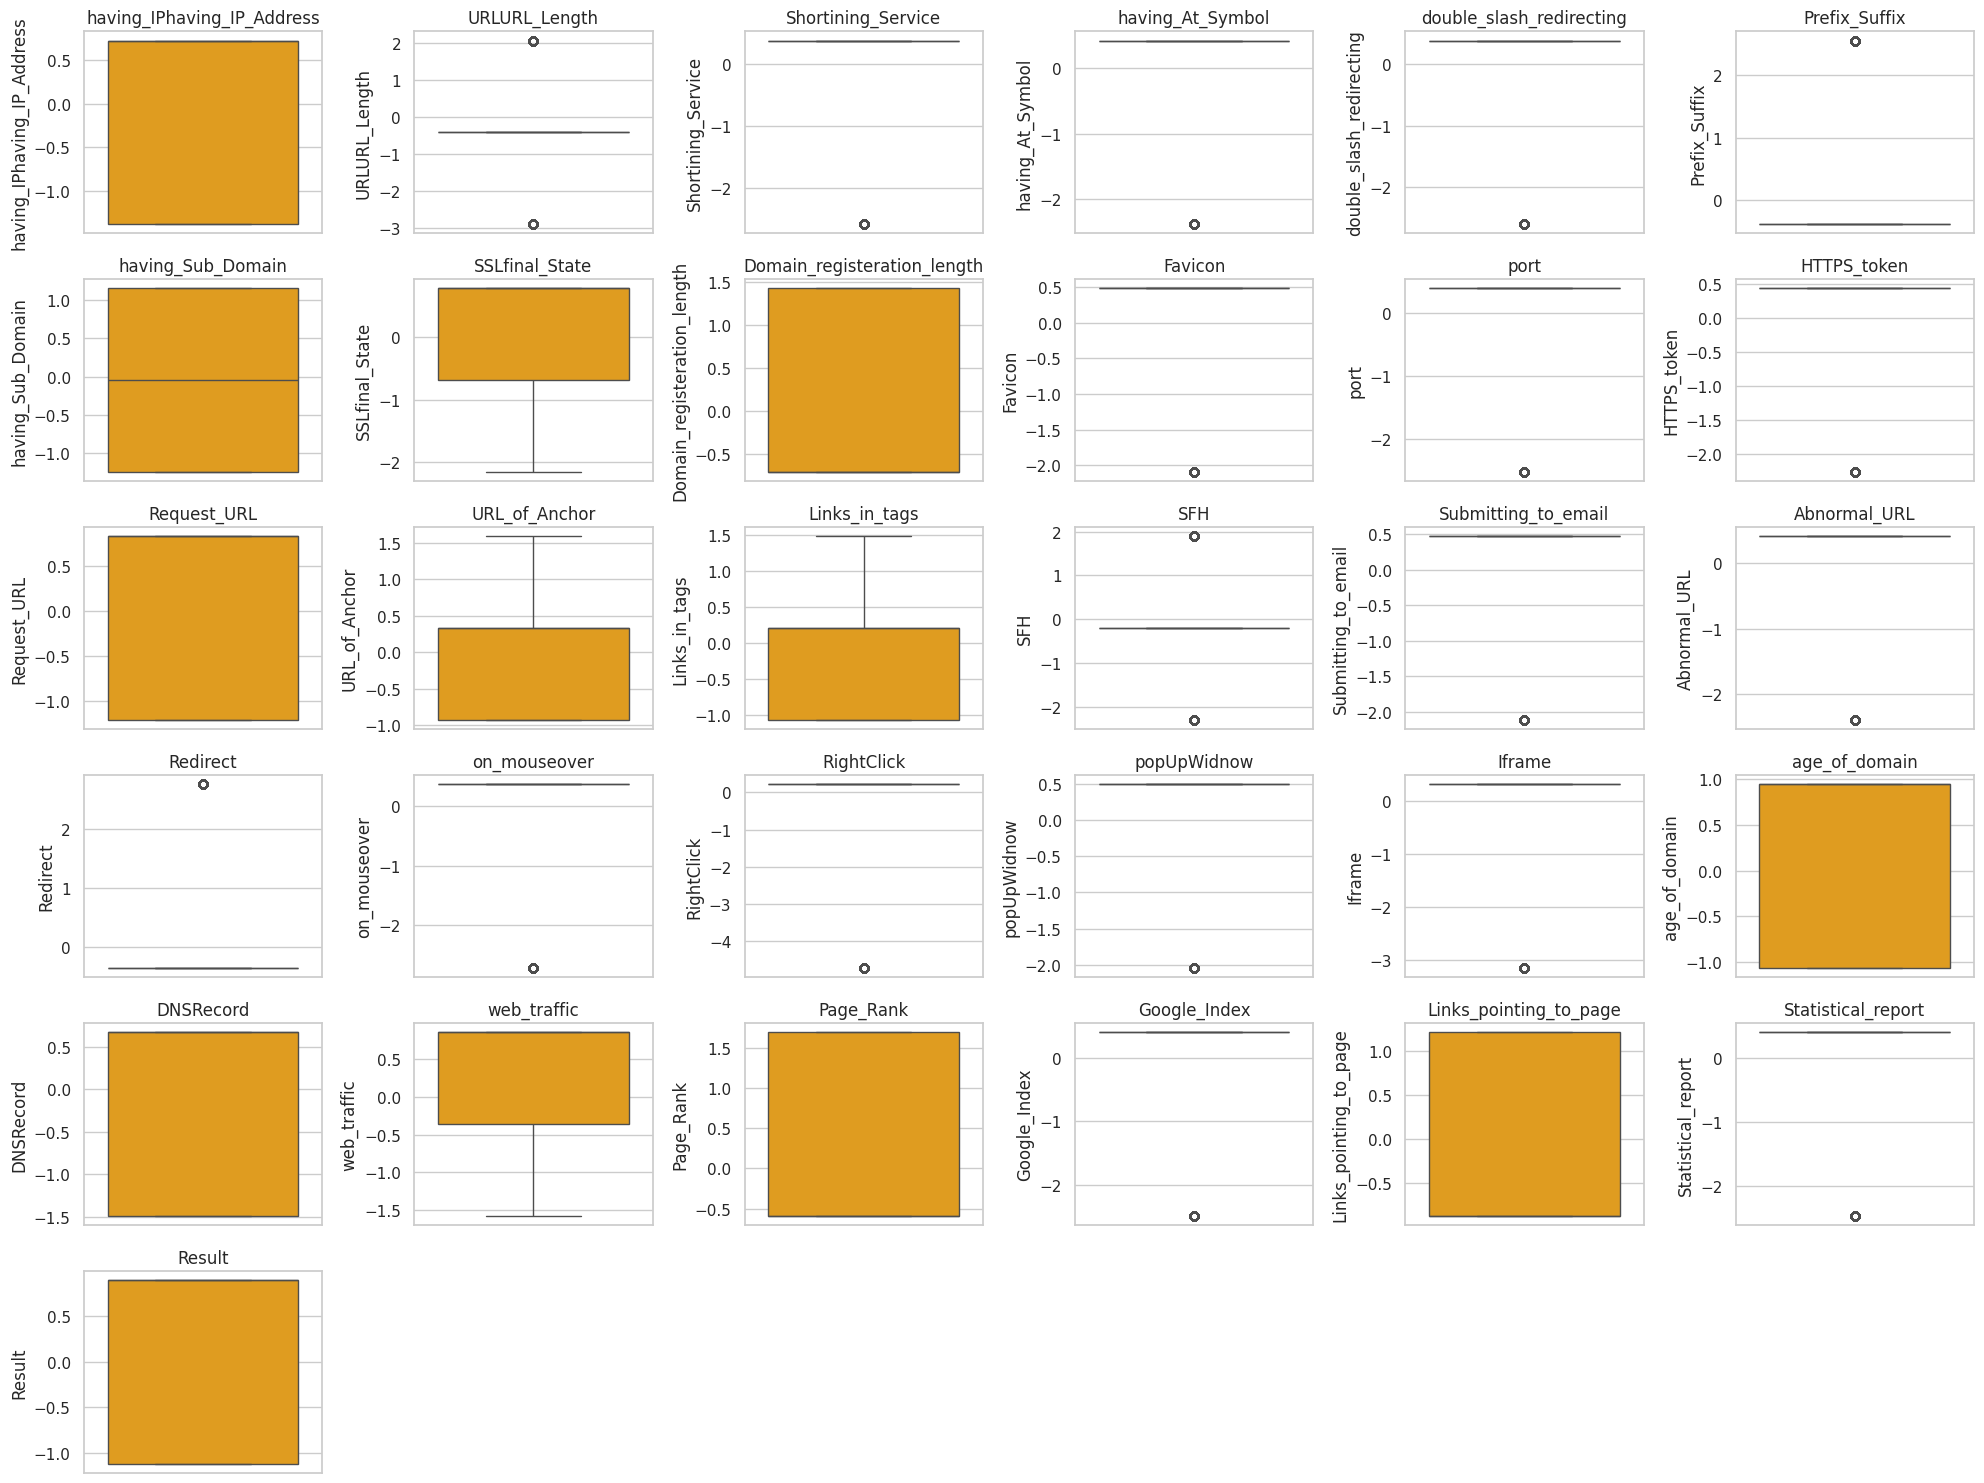

In [140]:
# Box plots for numerical features to understand the spread and detect outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(col)
plt.tight_layout()
plt.show()

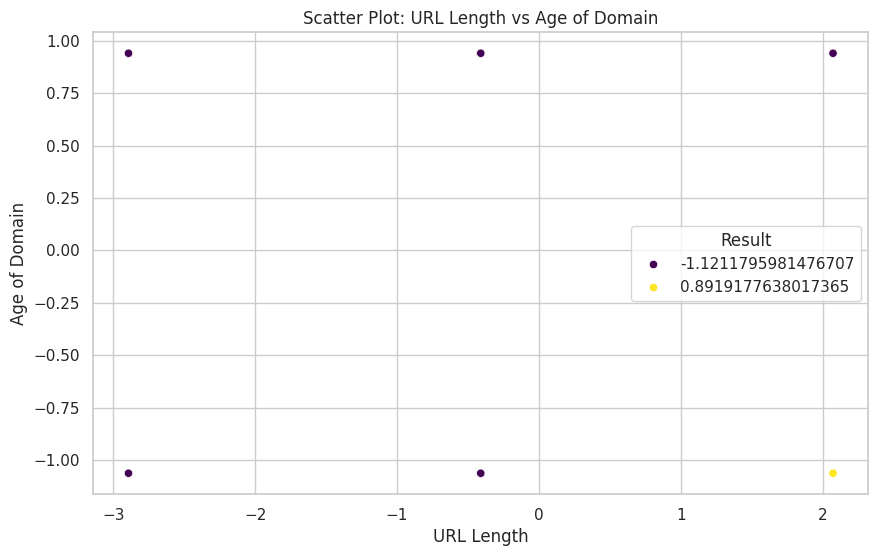

In [141]:
# Scatter plot for selected pairs of numerical features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='URLURL_Length', y='age_of_domain', hue='Result', data=df, palette='viridis')
plt.title('Scatter Plot: URL Length vs Age of Domain')
plt.xlabel('URL Length')
plt.ylabel('Age of Domain')
plt.show()

<ipython-input-142-28f993abbe87>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-142-28f993abbe87>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-142-28f993abbe87>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-142-28f993abbe87>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-142-28f993abbe87>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

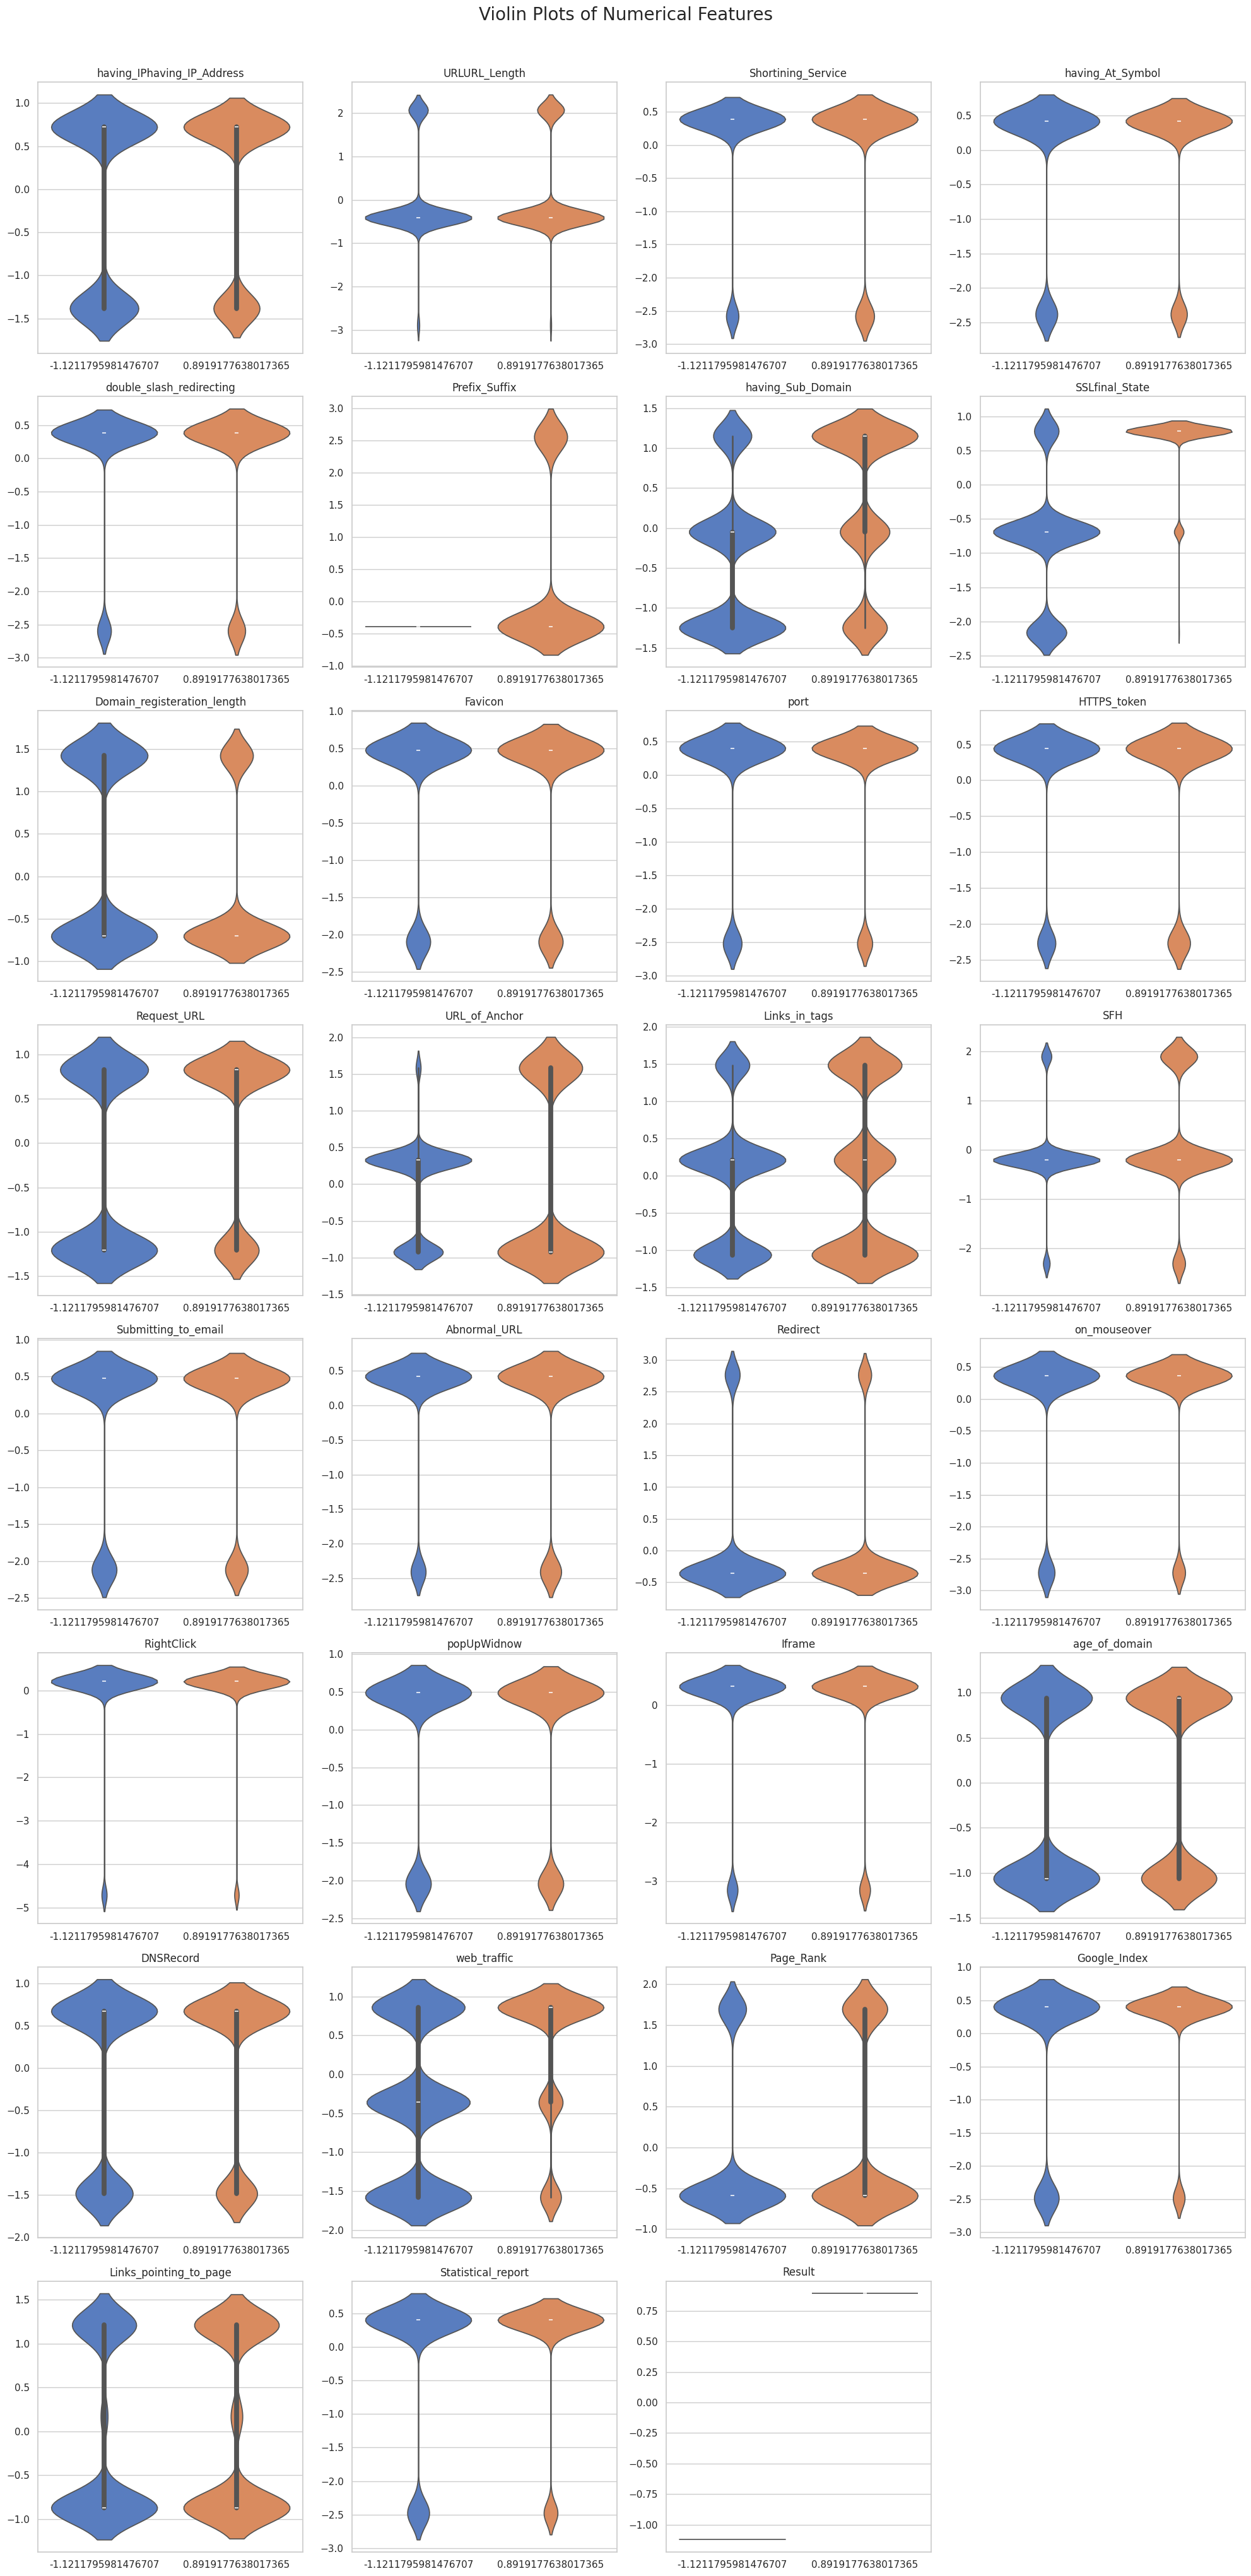

In [142]:
# Violin plots for numerical features with adjusted spacing
plt.figure(figsize=(20, 40))  # Increase the figure size for better spacing

# Creating individual violin plots for each numerical column
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(8, 4, i)
    sns.violinplot(x='Result', y=col, data=df, palette='muted')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Violin Plots of Numerical Features', fontsize=20, y=1.02)
plt.show()


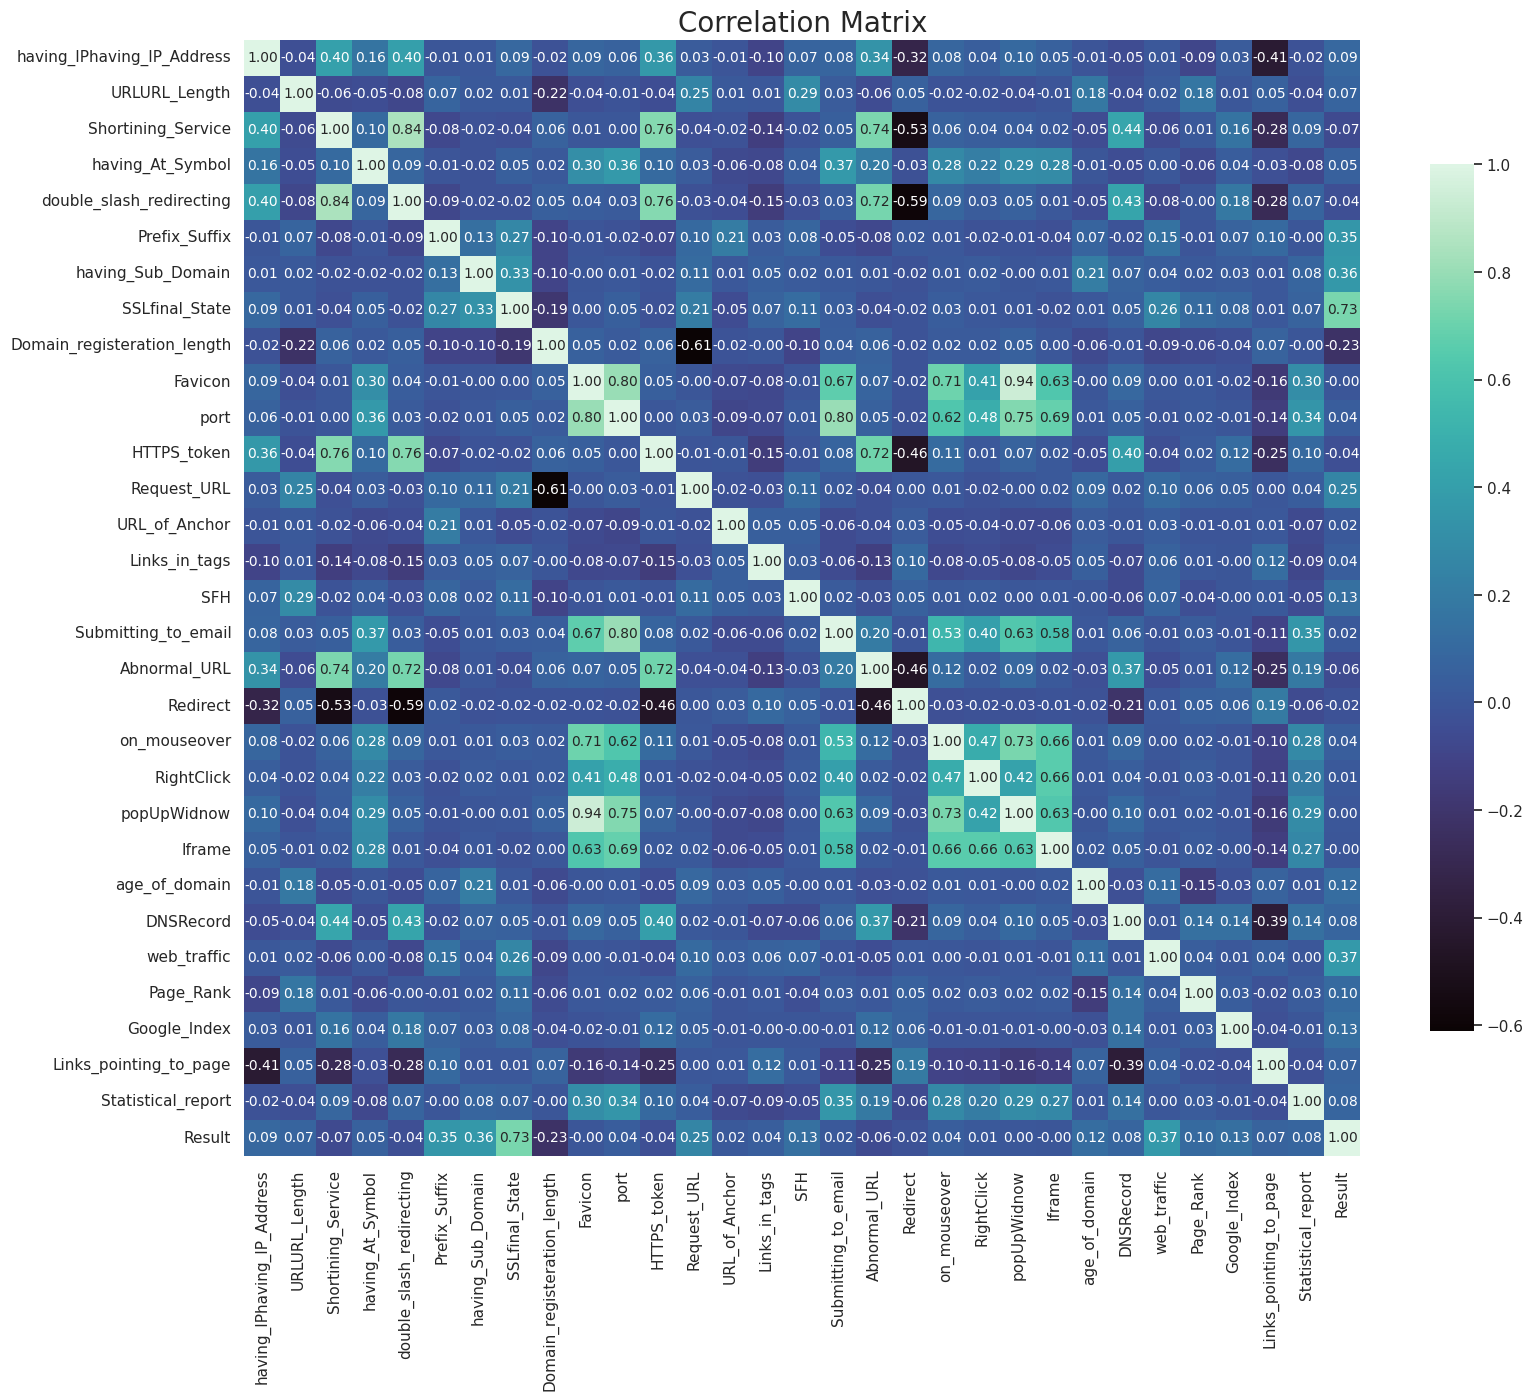

In [143]:
# Correlation matrix to see the relationships between numerical features
plt.figure(figsize=(18, 15))
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='mako', square=True,
            annot_kws={"size": 10}, cbar_kws={"shrink": .75})
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [144]:
# Animated scatter plot using Plotly
import plotly.express as px

# Sample the data for the animation
sample_df = df.sample(500)

# Adding a small constant to ensure the 'size' property has positive values
sample_df['size_positive'] = sample_df['age_of_domain'] + 1.1

# Creating the animated scatter plot
fig = px.scatter(sample_df, x='URLURL_Length', y='age_of_domain', color='Result',
                 animation_frame=sample_df.index.astype(str), animation_group='Result',
                 size='size_positive', hover_name='Result',
                 title='Animated Scatter Plot: URL Length vs Age of Domain')

fig.show()

### Section 8: Modeling

<ipython-input-145-768f14e89105>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




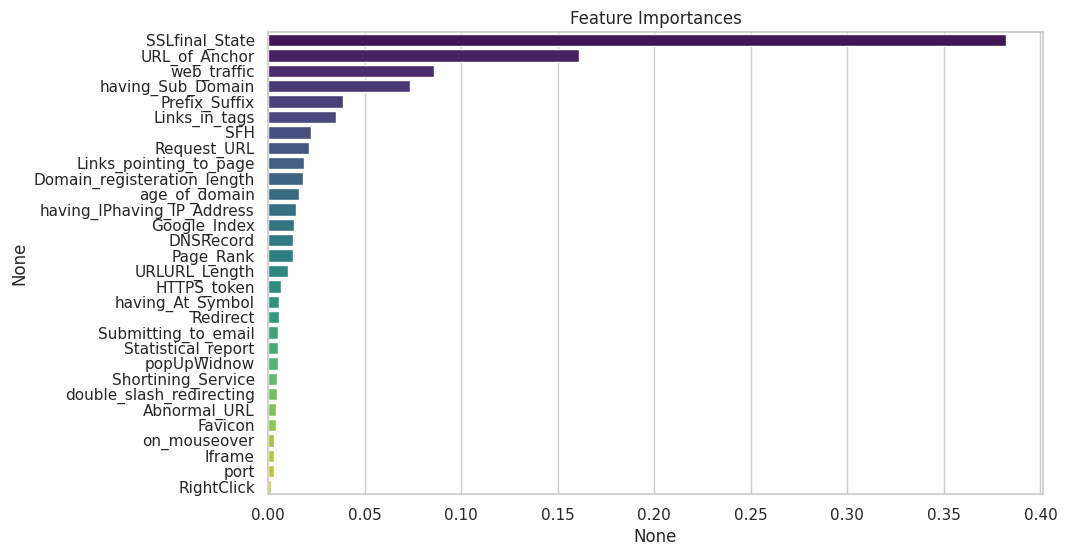

In [145]:
df['Result'] = df['Result'].astype('category')

# Convert the categorical labels to integer labels
df['Result'] = df['Result'].cat.codes

# Separate the features and target variable
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target variable

# Feature importance using Random Forest to select top features
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances')
plt.show()

# Select top features (let's assume top 10 for simplicity)
top_features = feature_importances.index[:10]
X_selected = X[top_features]

In [146]:
# Model Development
# Importing necessary libraries for model development
import pandas as pd
from sklearn.model_selection import train_test_split  # Import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Initialize the DataFrame to store results globally
data = pd.DataFrame(columns=['Model', 'Balancer', 'Accuracy', 'AUC', 'F1-Score', 'Precision', 'Recall'])
i = 0

# Ensure 'Result' is the target variable and is correctly formatted as categorical
df['Result'] = df['Result'].astype('category')
df['Result'] = df['Result'].cat.codes

# Separate the features and target variable
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to build and evaluate models
def build_model(X_train, X_test, y_train, y_test, balancer, model_name):
    global i
    # Feature scaling for distance-based or gradient descent-based algorithms
    if model_name in ['svm', 'KNN', 'LogisticRegression']:
        print('Applying Feature Scaling...')
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Initialize the model based on the input parameter
    if model_name == 'DecisionTreeClassifier':
        model = DecisionTreeClassifier(random_state=42, splitter='random', max_depth=2, min_samples_leaf=2)
    elif model_name == 'KNN':
        model = KNeighborsClassifier()
    elif model_name == 'XGBClassifier':
        model = XGBClassifier(objective='binary:logistic', eval_metric='auc')
    elif model_name == 'RandomForestClassifier':
        model = RandomForestClassifier(class_weight='balanced', n_estimators=100)
    elif model_name == 'svm':
        model = svm.SVC(kernel='linear', probability=True)
    elif model_name == 'gauss':
        model = GaussianNB()
    elif model_name == 'LogisticRegression':
        model = LogisticRegression()
    else:
        print('No Model Selected')
        return 'No Model Selected'

    # Apply balancing techniques if specified
    if balancer == 1:
        print('Applying Random Over Sampling...')
        ros = RandomOverSampler(random_state=42)
        X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
    elif balancer == 2:
        print('Applying SMOTE...')
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    else:
        print('No Balancing Applied...')
        X_train_balanced, y_train_balanced = X_train, y_train

    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    pred_prob = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pred_prob)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    fpr, tpr, thresh = roc_curve(y_test, pred_prob, pos_label=1)

    # Print metrics
    print('Model:', model_name, ' | Balancer:', balancer)
    print('Accuracy:', accuracy)
    print('AUC:', auc)
    print('F1-score:', f1)
    print('Precision:', precision)
    print('Recall:', recall)

    # Store results in the DataFrame
    data.loc[i] = [model_name, balancer, accuracy, auc, f1, precision, recall]
    i += 1

    return fpr, tpr, thresh

#### Full Model Evaluation

In [147]:
# Evaluate Decision Tree Classifier
print("Evaluating Decision Tree Classifier...")
DT_fpr, DT_tpr, DT_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'DecisionTreeClassifier')

Evaluating Decision Tree Classifier...
No Balancing Applied...
Model: DecisionTreeClassifier  | Balancer: 0
Accuracy: 0.8896593307205306
AUC: 0.9123250411864058
F1-score: 0.9042386185243327
Precision: 0.8939472322814278
Recall: 0.9147697194282689


In [148]:
DTROS_fpr, DTROS_tpr, DTROS_thresh = build_model(X_train, X_test, y_train, y_test, 1, 'DecisionTreeClassifier')

Applying Random Over Sampling...
Model: DecisionTreeClassifier  | Balancer: 1
Accuracy: 0.8896593307205306
AUC: 0.9123250411864058
F1-score: 0.9042386185243327
Precision: 0.8939472322814278
Recall: 0.9147697194282689


In [149]:
DTSMOTE_fpr, DTSMOTE_tpr, DTSMOTE_thresh = build_model(X_train, X_test, y_train, y_test, 2, 'DecisionTreeClassifier')

Applying SMOTE...
Model: DecisionTreeClassifier  | Balancer: 2
Accuracy: 0.8896593307205306
AUC: 0.9123250411864058
F1-score: 0.9042386185243327
Precision: 0.8939472322814278
Recall: 0.9147697194282689


In [150]:
# Drop the 'Result' column as it is not useful for model training
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target variable

# Convert target variable to categorical if needed
y = y.astype('category').cat.codes

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features if needed (for specific models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Evaluating Decision Tree Classifier...
No Balancing Applied...
Model: DecisionTreeClassifier  | Balancer: 0
Accuracy: 0.8896593307205306
AUC: 0.9123250411864058
F1-score: 0.9042386185243327
Precision: 0.8939472322814278
Recall: 0.9147697194282689


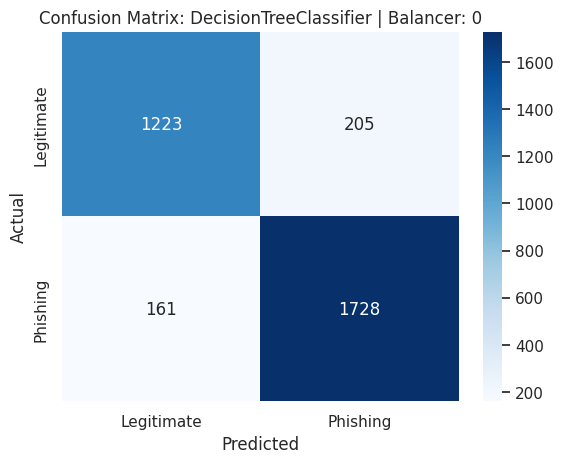

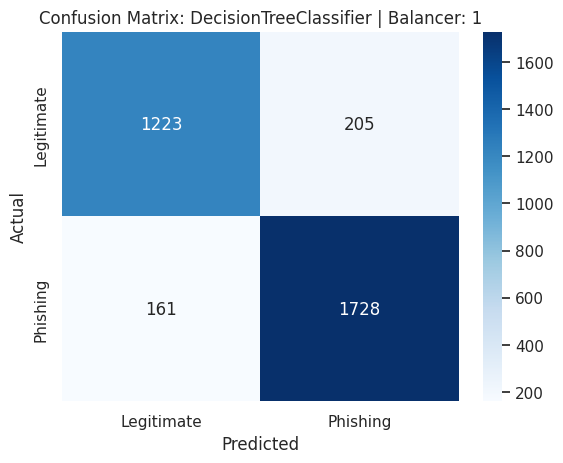

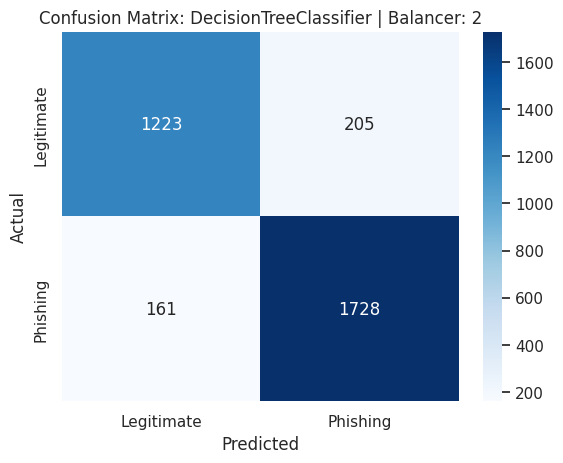

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_pred, model_name, balancer):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate Decision Tree Classifier
print("Evaluating Decision Tree Classifier...")
DT_fpr, DT_tpr, DT_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'DecisionTreeClassifier')
y_pred_DT = DecisionTreeClassifier(random_state=42, splitter='random', max_depth=2, min_samples_leaf=2).fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_DT, 'DecisionTreeClassifier', 0)

# Random Over Sampling for Decision Tree
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
model_DTROS = DecisionTreeClassifier(random_state=42, splitter='random', max_depth=2, min_samples_leaf=2).fit(X_train_balanced, y_train_balanced)
y_pred_DTROS = model_DTROS.predict(X_test)
plot_confusion_matrix(y_test, y_pred_DTROS, 'DecisionTreeClassifier', 1)

# SMOTE for Decision Tree
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
model_DTSMOTE = DecisionTreeClassifier(random_state=42, splitter='random', max_depth=2, min_samples_leaf=2).fit(X_train_balanced, y_train_balanced)
y_pred_DTSMOTE = model_DTSMOTE.predict(X_test)
plot_confusion_matrix(y_test, y_pred_DTSMOTE, 'DecisionTreeClassifier', 2)

In [152]:
# Evaluate KNN Classifier
print("Evaluating KNN Classifier...")
KNN_fpr, KNN_tpr, KNN_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'KNN')

Evaluating KNN Classifier...
Applying Feature Scaling...
No Balancing Applied...
Model: KNN  | Balancer: 0
Accuracy: 0.9345794392523364
AUC: 0.9820674166966945
F1-score: 0.9422718808193669
Precision: 0.9470588235294117
Recall: 0.9375330862890419


In [153]:
KNNROS_fpr, KNNROS_tpr, KNNROS_thresh = build_model(X_train, X_test, y_train, y_test, 1, 'KNN')

Applying Feature Scaling...
Applying Random Over Sampling...
Model: KNN  | Balancer: 1
Accuracy: 0.9297558034368405
AUC: 0.9821391499956256
F1-score: 0.937416062315337
Precision: 0.9514721919302072
Recall: 0.9237691900476442


In [154]:
KNNSMOTE_fpr, KNNSMOTE_tpr, KNNSMOTE_thresh = build_model(X_train, X_test, y_train, y_test, 2, 'KNN')

Applying Feature Scaling...
Applying SMOTE...
Model: KNN  | Balancer: 2
Accuracy: 0.9303587579137775
AUC: 0.9819712162260351
F1-score: 0.937986577181208
Precision: 0.9515250544662309
Recall: 0.9248279512969825


Evaluating KNN Classifier...
Applying Feature Scaling...
No Balancing Applied...
Model: KNN  | Balancer: 0
Accuracy: 0.9345794392523364
AUC: 0.9820674166966945
F1-score: 0.9422718808193669
Precision: 0.9470588235294117
Recall: 0.9375330862890419


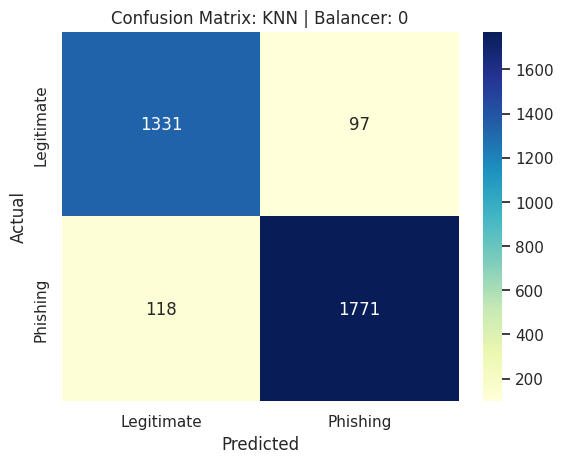

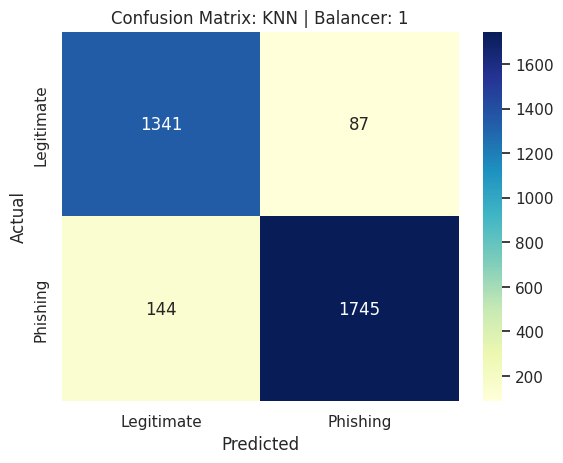

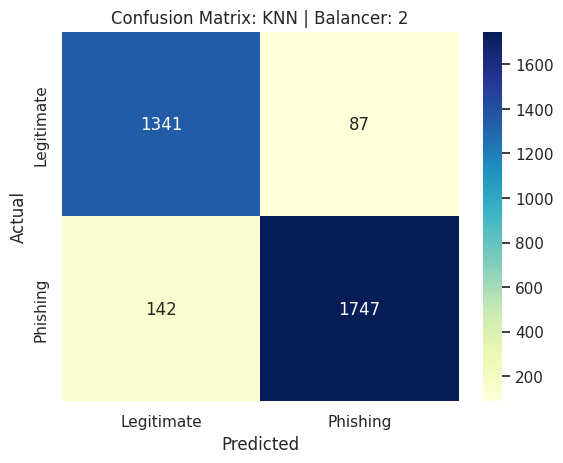

In [155]:
def plot_confusion_matrix(y_test, y_pred, model_name, balancer, color):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate KNN Classifier
print("Evaluating KNN Classifier...")
KNN_fpr, KNN_tpr, KNN_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'KNN')
y_pred_KNN = KNeighborsClassifier().fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_KNN, 'KNN', 0, 'YlGnBu')

# Random Over Sampling for KNN
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
model_KNNROS = KNeighborsClassifier().fit(X_train_balanced, y_train_balanced)
y_pred_KNNROS = model_KNNROS.predict(X_test)
plot_confusion_matrix(y_test, y_pred_KNNROS, 'KNN', 1, 'YlGnBu')

# SMOTE for KNN
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
model_KNNSMOTE = KNeighborsClassifier().fit(X_train_balanced, y_train_balanced)
y_pred_KNNSMOTE = model_KNNSMOTE.predict(X_test)
plot_confusion_matrix(y_test, y_pred_KNNSMOTE, 'KNN', 2, 'YlGnBu')


In [156]:
# Evaluate Logistic Regression
print("Evaluating Logistic Regression...")
LR_fpr, LR_tpr, LR_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'LogisticRegression')

Evaluating Logistic Regression...
Applying Feature Scaling...
No Balancing Applied...
Model: LogisticRegression  | Balancer: 0
Accuracy: 0.9095568284594513
AUC: 0.9691318825041927
F1-score: 0.920886075949367
Precision: 0.9174986862848135
Recall: 0.9242985706723134


In [157]:
LRROS_fpr, LRROS_tpr, LRROS_thresh = build_model(X_train, X_test, y_train, y_test, 1, 'LogisticRegression')

Applying Feature Scaling...
Applying Random Over Sampling...
Model: LogisticRegression  | Balancer: 1
Accuracy: 0.9080494422671088
AUC: 0.9691222439213907
F1-score: 0.918774966711052
Precision: 0.9244372990353698
Recall: 0.9131815775542615


In [158]:
LRSMOTE_fpr, LRSMOTE_tpr, LRSMOTE_thresh = build_model(X_train, X_test, y_train, y_test, 2, 'LogisticRegression')

Applying Feature Scaling...
Applying SMOTE...
Model: LogisticRegression  | Balancer: 2
Accuracy: 0.9083509195055773
AUC: 0.9691463403783959
F1-score: 0.9191489361702128
Precision: 0.9235702832709781
Recall: 0.9147697194282689


Evaluating Logistic Regression...
Applying Feature Scaling...
No Balancing Applied...
Model: LogisticRegression  | Balancer: 0
Accuracy: 0.9095568284594513
AUC: 0.9691318825041927
F1-score: 0.920886075949367
Precision: 0.9174986862848135
Recall: 0.9242985706723134


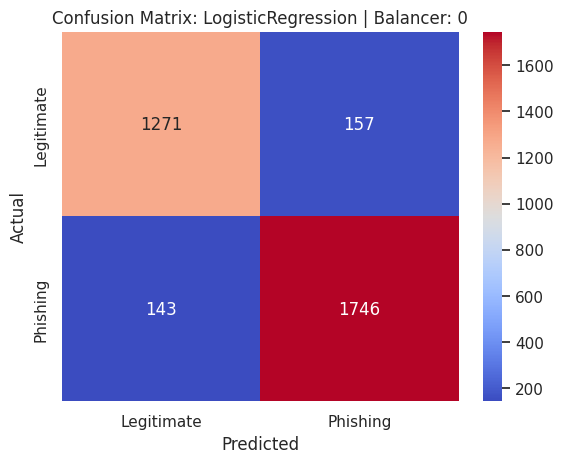

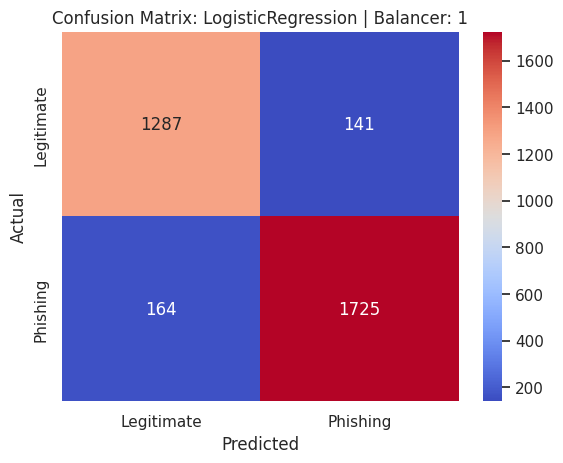

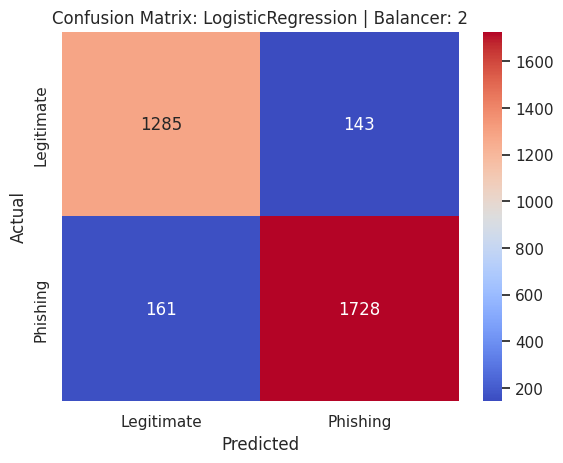

In [159]:
def plot_confusion_matrix(y_test, y_pred, model_name, balancer, color):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate Logistic Regression
print("Evaluating Logistic Regression...")
LR_fpr, LR_tpr, LR_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'LogisticRegression')
y_pred_LR = LogisticRegression().fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_LR, 'LogisticRegression', 0, 'coolwarm')

# Random Over Sampling for Logistic Regression
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
model_LRROS = LogisticRegression().fit(X_train_balanced, y_train_balanced)
y_pred_LRROS = model_LRROS.predict(X_test)
plot_confusion_matrix(y_test, y_pred_LRROS, 'LogisticRegression', 1, 'coolwarm')

# SMOTE for Logistic Regression
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
model_LRSMOTE = LogisticRegression().fit(X_train_balanced, y_train_balanced)
y_pred_LRSMOTE = model_LRSMOTE.predict(X_test)
plot_confusion_matrix(y_test, y_pred_LRSMOTE, 'LogisticRegression', 2, 'coolwarm')


In [160]:
# Evaluate XGB Classifier
print("Evaluating XGB Classifier...")
XGB_fpr, XGB_tpr, XGB_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'XGBClassifier')

Evaluating XGB Classifier...
No Balancing Applied...
Model: XGBClassifier  | Balancer: 0
Accuracy: 0.9683448899608079
AUC: 0.9957807103783811
F1-score: 0.9724047306176086
Precision: 0.965553235908142
Recall: 0.9793541556379036


In [161]:
XGBROS_fpr, XGBROS_tpr, XGBROS_thresh = build_model(X_train, X_test, y_train, y_test, 1, 'XGBClassifier')

Applying Random Over Sampling...
Model: XGBClassifier  | Balancer: 1
Accuracy: 0.9704552306300874
AUC: 0.9958411368782558
F1-score: 0.9742376445846478
Precision: 0.9676240208877285
Recall: 0.9809422975119111


In [162]:
XGBSMOTE_fpr, XGBSMOTE_tpr, XGBSMOTE_thresh = build_model(X_train, X_test, y_train, y_test, 2, 'XGBClassifier')

Applying SMOTE...
Model: XGBClassifier  | Balancer: 2
Accuracy: 0.9701537533916189
AUC: 0.9957588382097149
F1-score: 0.9740498034076016
Precision: 0.9646936656282451
Recall: 0.9835892006352568


Evaluating XGBoost Classifier...
No Balancing Applied...
Model: XGBClassifier  | Balancer: 0
Accuracy: 0.9683448899608079
AUC: 0.9957807103783811
F1-score: 0.9724047306176086
Precision: 0.965553235908142
Recall: 0.9793541556379036


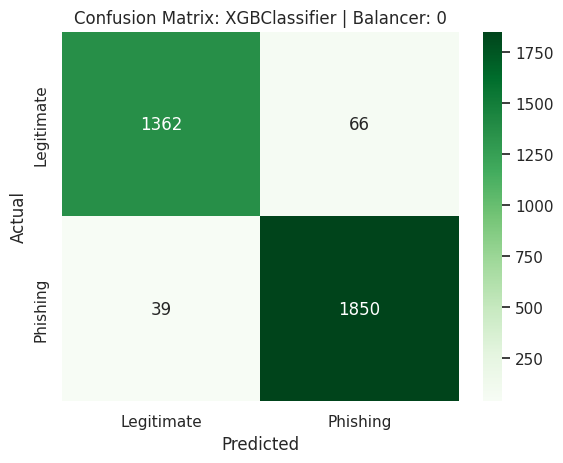

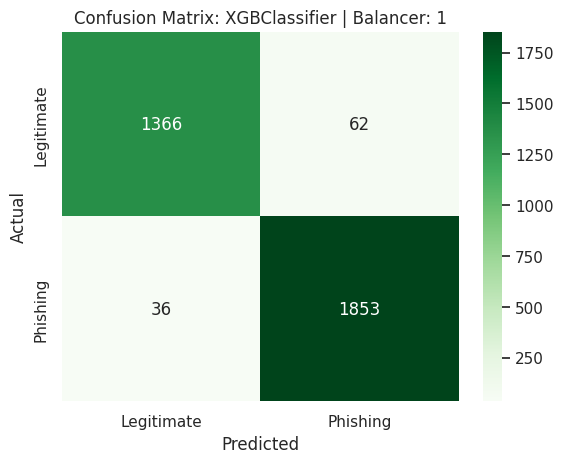

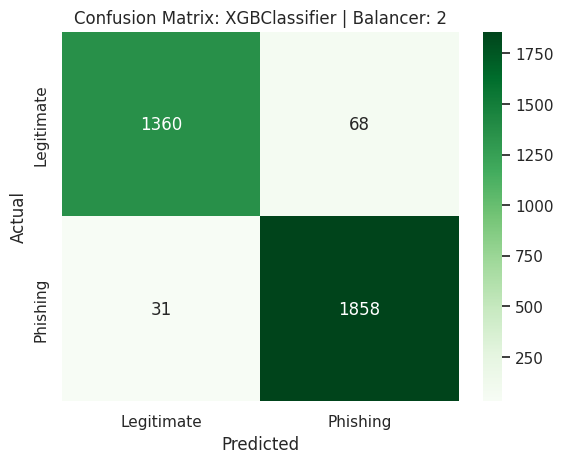

In [163]:
def plot_confusion_matrix(y_test, y_pred, model_name, balancer, color):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate XGBoost Classifier
print("Evaluating XGBoost Classifier...")
XGB_fpr, XGB_tpr, XGB_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'XGBClassifier')
y_pred_XGB = XGBClassifier(objective='binary:logistic', eval_metric='auc').fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_XGB, 'XGBClassifier', 0, 'Greens')

# Random Over Sampling for XGBoost
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
model_XGBROS = XGBClassifier(objective='binary:logistic', eval_metric='auc').fit(X_train_balanced, y_train_balanced)
y_pred_XGBROS = model_XGBROS.predict(X_test)
plot_confusion_matrix(y_test, y_pred_XGBROS, 'XGBClassifier', 1, 'Greens')

# SMOTE for XGBoost
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
model_XGBSMOTE = XGBClassifier(objective='binary:logistic', eval_metric='auc').fit(X_train_balanced, y_train_balanced)
y_pred_XGBSMOTE = model_XGBSMOTE.predict(X_test)
plot_confusion_matrix(y_test, y_pred_XGBSMOTE, 'XGBClassifier', 2, 'Greens')


In [164]:
# Evaluate Random Forest Classifier
print("Evaluating Random Forest Classifier...")
RF_fpr, RF_tpr, RF_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'RandomForestClassifier')

Evaluating Random Forest Classifier...
No Balancing Applied...
Model: RandomForestClassifier  | Balancer: 0
Accuracy: 0.9692493216762135
AUC: 0.9950804302663363
F1-score: 0.973186119873817
Precision: 0.9665796344647519
Recall: 0.9798835362625727


In [165]:
RFROS_fpr, RFROS_tpr, RFROS_thresh = build_model(X_train, X_test, y_train, y_test, 1, 'RandomForestClassifier')

Applying Random Over Sampling...
Model: RandomForestClassifier  | Balancer: 1
Accuracy: 0.9683448899608079
AUC: 0.9942296399766894
F1-score: 0.9723611476704396
Precision: 0.9670157068062827
Recall: 0.9777660137638963


In [166]:
RFSMOTE_fpr, RFSMOTE_tpr, RFSMOTE_thresh = build_model(X_train, X_test, y_train, y_test, 2, 'RandomForestClassifier')

Applying SMOTE...
Model: RandomForestClassifier  | Balancer: 2
Accuracy: 0.9680434127223395
AUC: 0.9948435435582386
F1-score: 0.972193074501574
Precision: 0.9635985439417577
Recall: 0.9809422975119111


Evaluating RandomForest Classifier...
No Balancing Applied...
Model: RandomForestClassifier  | Balancer: 0
Accuracy: 0.9674404582454025
AUC: 0.9946997062456534
F1-score: 0.971608832807571
Precision: 0.9650130548302872
Recall: 0.9782953943885654


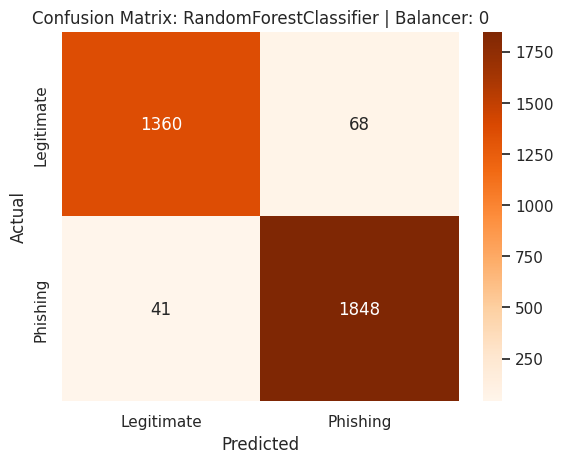

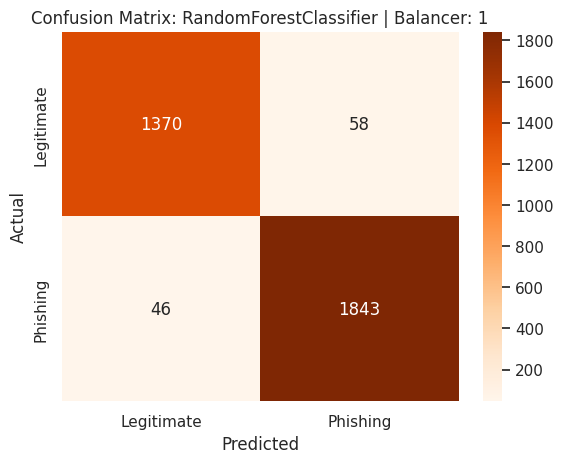

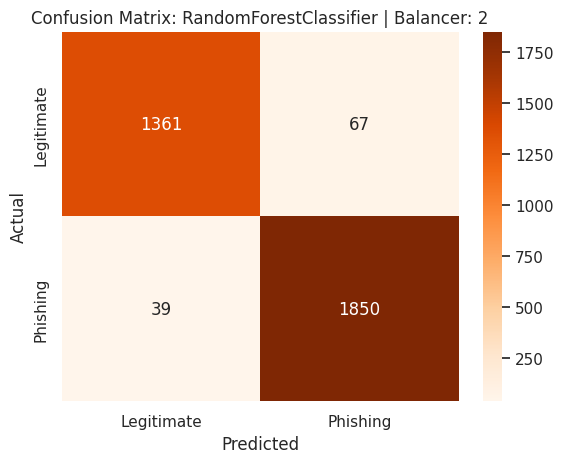

In [167]:
def plot_confusion_matrix(y_test, y_pred, model_name, balancer, color):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate RandomForest Classifier
print("Evaluating RandomForest Classifier...")
RF_fpr, RF_tpr, RF_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'RandomForestClassifier')
y_pred_RF = RandomForestClassifier(class_weight='balanced', n_estimators=100).fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_RF, 'RandomForestClassifier', 0, 'Oranges')

# Random Over Sampling for RandomForest
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)
model_RFROS = RandomForestClassifier(class_weight='balanced', n_estimators=100).fit(X_train_balanced, y_train_balanced)
y_pred_RFROS = model_RFROS.predict(X_test)
plot_confusion_matrix(y_test, y_pred_RFROS, 'RandomForestClassifier', 1, 'Oranges')

# SMOTE for RandomForest
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
model_RFSMOTE = RandomForestClassifier(class_weight='balanced', n_estimators=100).fit(X_train_balanced, y_train_balanced)
y_pred_RFSMOTE = model_RFSMOTE.predict(X_test)
plot_confusion_matrix(y_test, y_pred_RFSMOTE, 'RandomForestClassifier', 2, 'Oranges')


In [168]:
# Evaluate SVM
print("Evaluating SVM Classifier...")
SVMROS_fpr, SVMROS_tpr, SVMROS_thresh = build_model(X_train, X_test, y_train,  y_test, 1, 'svm')

Evaluating SVM Classifier...
Applying Feature Scaling...
Applying Random Over Sampling...
Model: svm  | Balancer: 1
Accuracy: 0.9110642146517938
AUC: 0.966847167665372
F1-score: 0.9221841202848853
Precision: 0.9190325972660357
Recall: 0.9253573319216517


Evaluating SVM Classifier with Random Over Sampling...
Applying Feature Scaling...
Applying Random Over Sampling...
Model: svm  | Balancer: 1
Accuracy: 0.9110642146517938
AUC: 0.9668545819598352
F1-score: 0.9221841202848853
Precision: 0.9190325972660357
Recall: 0.9253573319216517


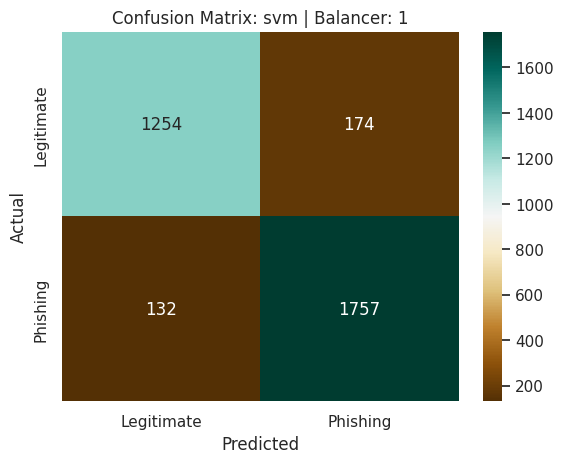

In [169]:
def plot_confusion_matrix(y_test, y_pred, model_name, balancer, color):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate SVM with Random Over Sampling
print("Evaluating SVM Classifier with Random Over Sampling...")
SVMROS_fpr, SVMROS_tpr, SVMROS_thresh = build_model(X_train, X_test, y_train, y_test, 1, 'svm')
y_pred_SVMROS = svm.SVC(kernel='linear', probability=True).fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_SVMROS, 'svm', 1, 'BrBG')

In [170]:
# Evaluate Gaussian Naive Bayes
print("Evaluating Gaussian Naive Bayes...")
gauss_fpr, gauss_tpr, gauss_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'gauss')

Evaluating Gaussian Naive Bayes...
No Balancing Applied...
Model: gauss  | Balancer: 0
Accuracy: 0.5646668676514923
AUC: 0.9665235337120555
F1-score: 0.3813196229648672
Precision: 1.0
Recall: 0.235574377977766


Evaluating Gaussian Naive Bayes Classifier...
No Balancing Applied...
Model: gauss  | Balancer: 0
Accuracy: 0.5646668676514923
AUC: 0.9665235337120555
F1-score: 0.3813196229648672
Precision: 1.0
Recall: 0.235574377977766


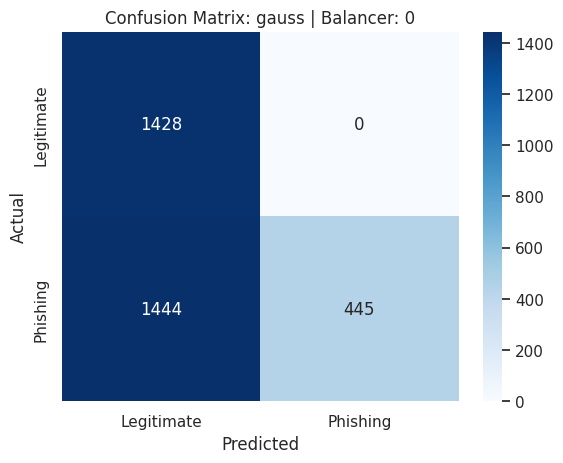

In [171]:
def plot_confusion_matrix(y_test, y_pred, model_name, balancer, color):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix: {model_name} | Balancer: {balancer}')
    plt.show()

# Evaluate Gaussian Naive Bayes Classifier
print("Evaluating Gaussian Naive Bayes Classifier...")
gauss_fpr, gauss_tpr, gauss_thresh = build_model(X_train, X_test, y_train, y_test, 0, 'gauss')
y_pred_gauss = GaussianNB().fit(X_train, y_train).predict(X_test)
plot_confusion_matrix(y_test, y_pred_gauss, 'gauss', 0, 'Blues')

In [172]:
# Display the DataFrame with results
print("Model Evaluation Results:")
print(data)

Model Evaluation Results:
                     Model  Balancer  Accuracy       AUC  F1-Score  Precision  \
0   DecisionTreeClassifier         0  0.889659  0.912325  0.904239   0.893947   
1   DecisionTreeClassifier         1  0.889659  0.912325  0.904239   0.893947   
2   DecisionTreeClassifier         2  0.889659  0.912325  0.904239   0.893947   
3   DecisionTreeClassifier         0  0.889659  0.912325  0.904239   0.893947   
4                      KNN         0  0.934579  0.982067  0.942272   0.947059   
5                      KNN         1  0.929756  0.982139  0.937416   0.951472   
6                      KNN         2  0.930359  0.981971  0.937987   0.951525   
7                      KNN         0  0.934579  0.982067  0.942272   0.947059   
8       LogisticRegression         0  0.909557  0.969132  0.920886   0.917499   
9       LogisticRegression         1  0.908049  0.969122  0.918775   0.924437   
10      LogisticRegression         2  0.908351  0.969146  0.919149   0.923570   
11

In [173]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize models
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42, min_weight_fraction_leaf=0.2, max_depth=3)

# Train models
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)

# Predict on the testing set
rf_pred = rf.predict(X_test)
gbm_pred = gbm.predict(X_test)

# Combine predictions using voting
ensemble_pred = (rf_pred + gbm_pred) >= 1

# Calculate ensemble model metrics
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_auc = roc_auc_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)

# Print ensemble model metrics
print("Ensemble Accuracy:", ensemble_accuracy)
print('AUC:', ensemble_auc)
print('F1-score:', ensemble_f1)
print('Precision:', ensemble_precision)
print('Recall:', ensemble_recall)


Ensemble Accuracy: 0.9487488694603557
AUC: 0.942356084837323
F1-score: 0.9564549180327869
Precision: 0.9265508684863524
Recall: 0.988353626257279


In [174]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Generate a synthetic dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Create the individual models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Create the ensemble model using soft voting
ensemble = VotingClassifier(estimators=[('rf', rf_model), ('gbm', gbm_model)], voting='soft')

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred = ensemble.predict(X_test)

# Calculate the accuracy and other metrics of the ensemble model
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the accuracy and other metrics of the ensemble model
print('Ensemble Model Performance:')
print('Accuracy:', accuracy)
print('AUC:', auc)
print('F1-score:', f1)
print('Precision:', precision)
print('Recall:', recall)


Ensemble Model Performance:
Accuracy: 0.9266666666666666
AUC: 0.9271708683473389
F1-score: 0.9271523178807947
Precision: 0.9032258064516129
Recall: 0.9523809523809523


In [175]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the K-fold cross-validation object
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the model using K-fold cross-validation and different scoring metrics
accuracy_scores = cross_val_score(rf_classifier, X, Y, cv=kfold, scoring='accuracy')
auc_scores = cross_val_score(rf_classifier, X, Y, cv=kfold, scoring='roc_auc')
f1_scores = cross_val_score(rf_classifier, X, Y, cv=kfold, scoring='f1')
precision_scores = cross_val_score(rf_classifier, X, Y, cv=kfold, scoring='precision')
recall_scores = cross_val_score(rf_classifier, X, Y, cv=kfold, scoring='recall')

# Print the mean and standard deviation of the scores for each metric
print('Model Evaluation with K-Fold Cross-Validation:')
print(f'Accuracy - Mean: {np.mean(accuracy_scores):.4f}, Std: {np.std(accuracy_scores):.4f}')
print(f'AUC - Mean: {np.mean(auc_scores):.4f}, Std: {np.std(auc_scores):.4f}')
print(f'F1-score - Mean: {np.mean(f1_scores):.4f}, Std: {np.std(f1_scores):.4f}')
print(f'Precision - Mean: {np.mean(precision_scores):.4f}, Std: {np.std(precision_scores):.4f}')
print(f'Recall - Mean: {np.mean(recall_scores):.4f}, Std: {np.std(recall_scores):.4f}')


Model Evaluation with K-Fold Cross-Validation:
Accuracy - Mean: 0.9320, Std: 0.0144
AUC - Mean: 0.9810, Std: 0.0048
F1-score - Mean: 0.9325, Std: 0.0149
Precision - Mean: 0.9259, Std: 0.0276
Recall - Mean: 0.9406, Std: 0.0306


#### ROC Curve

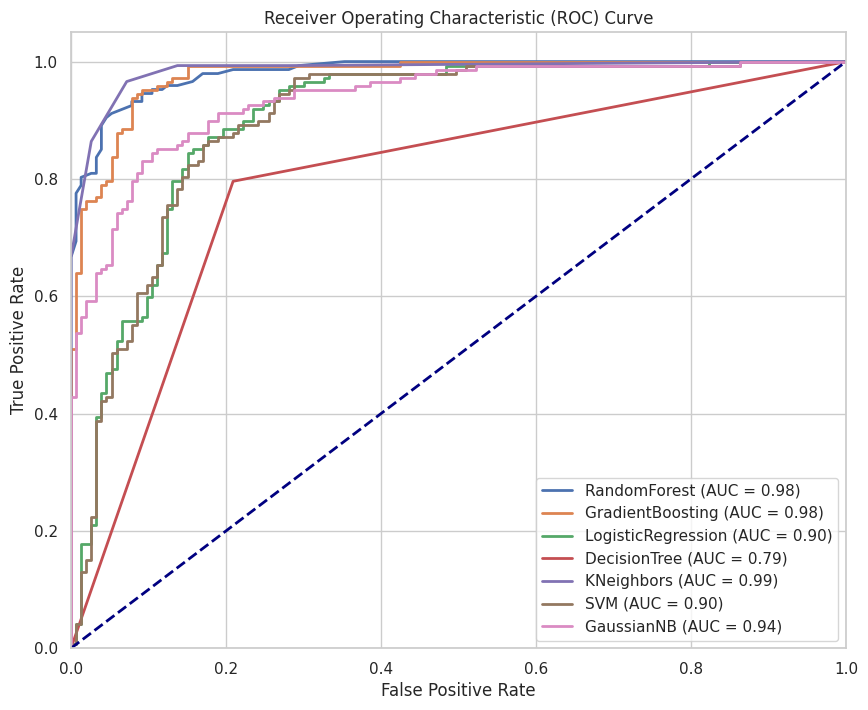

In [176]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC  # Import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Generate a synthetic dataset
X, Y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "LogisticRegression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "KNeighbors": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear', probability=True),  # SVC imported and used here
    "GaussianNB": GaussianNB()
}

# Fit the models and calculate ROC curves
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (model_name, roc_auc))

# Add a diagonal line representing the TPR = FPR (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Section 9: Feed-Forward Neural Network

In [177]:
# Import necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [178]:
df = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'Result': np.random.randint(2, size=1000)
})

# Separate the features and target variable
X = df.drop(columns=['Result'])  # Features
y = df['Result']  # Target variable

# Convert target variable to categorical
y = to_categorical(y, num_classes=2)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [179]:
# Define and Train the Feed-Forward Neural Network

# Define the model
model_ff = Sequential()
model_ff.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_ff.add(Dense(32, activation='relu'))
model_ff.add(Dense(2, activation='softmax'))  # Assuming binary classification

# Compile the model
model_ff.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_ff.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
70/70 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.4929
Epoch 2/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5357
Epoch 3/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6915 - accuracy: 0.5429
Epoch 4/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5457
Epoch 5/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5586
Epoch 6/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6911 - accuracy: 0.5400
Epoch 7/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5557
Epoch 8/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5500
Epoch 9/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6899 - accuracy: 0.5500
Epoch 10/50
70/70 [==============================] - 0s 1ms/step - loss: 0.6905 - accuracy: 0.5471
Epoch 11/50
70/70 [

In [180]:
# Evalaute the Feed-Forward Neural Network
# Predict probabilities
y_prob_ff = model_ff.predict(X_test)

# Convert probabilities to class labels
y_pred_ff = np.argmax(y_prob_ff, axis=1)
y_true_ff = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy_ff = accuracy_score(y_true_ff, y_pred_ff)
auc_ff = roc_auc_score(y_test, y_prob_ff, multi_class='ovr')
f1_ff = f1_score(y_true_ff, y_pred_ff)
precision_ff = precision_score(y_true_ff, y_pred_ff)
recall_ff = recall_score(y_true_ff, y_pred_ff)

# Print the results
print('Feed-Forward Neural Network Performance:')
print('Accuracy:', accuracy_ff)
print('AUC:', auc_ff)
print('F1-score:', f1_ff)
print('Precision:', precision_ff)
print('Recall:', recall_ff)

10/10 [==============================] - 0s 1ms/step
Feed-Forward Neural Network Performance:
Accuracy: 0.4866666666666667
AUC: 0.4731696428571428
F1-score: 0.47619047619047616
Precision: 0.5223880597014925
Recall: 0.4375


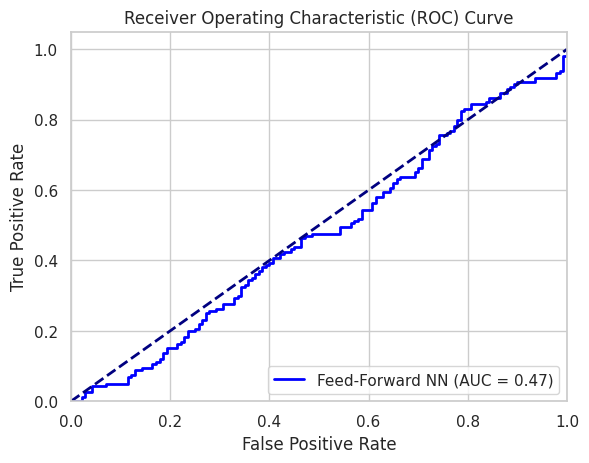

In [181]:
# Plot the ROC curve
fpr_ff, tpr_ff, _ = roc_curve(y_true_ff, y_prob_ff[:, 1])
plt.plot(fpr_ff, tpr_ff, color='blue', lw=2, label='Feed-Forward NN (AUC = %0.2f)' % auc_ff)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()